In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('CTD_compound_from_pubchem.csv')

In [6]:
data_sorted = data.sort_values('mw')

In [17]:
data_sorted.columns

Index(['cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea', 'complexity',
       'xlogp', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'inchi',
       'isosmiles', 'inchikey', 'iupacname', 'meshheadings', 'annothits',
       'annothitcnt', 'aids', 'cidcdate', 'sidsrcname', 'depcatg',
       'annotation'],
      dtype='object')

Text(0.5, 1.0, 'hbondacc')

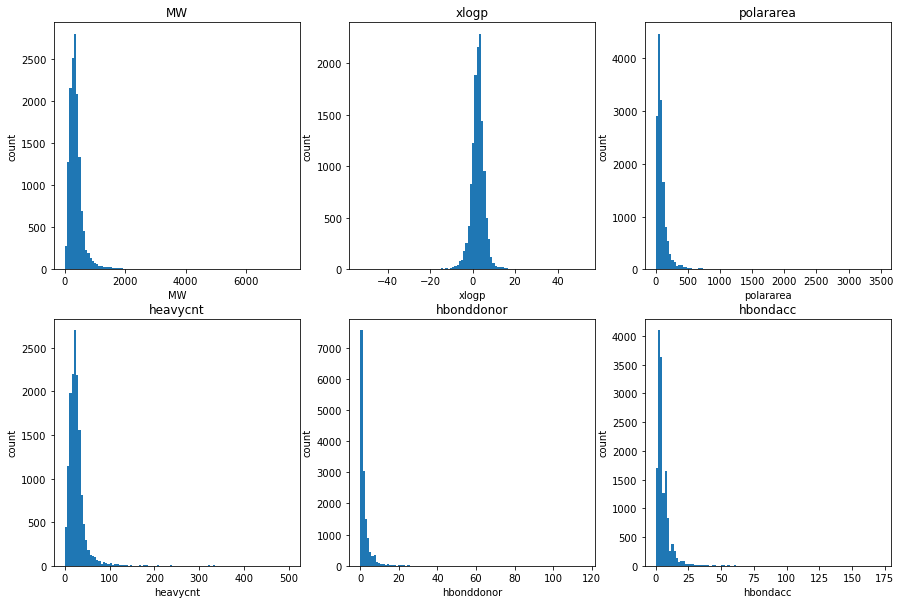

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,3,1)
x = data_sorted['mw']
plt.hist(x, bins=100)
plt.ylabel('count')
plt.xlabel('MW')
plt.title('MW')

ax2=fig.add_subplot(2,3,2)
x = data_sorted['xlogp']
plt.hist(x, bins=100)
plt.ylabel('count')
plt.xlabel('xlogp')
plt.title('xlogp')

ax3=fig.add_subplot(2,3,3)
x = data_sorted['polararea']
plt.hist(x, bins=100)
plt.ylabel('count')
plt.xlabel('polararea')
plt.title('polararea')


ax4=fig.add_subplot(2,3,4)
x = data_sorted['heavycnt']
plt.hist(x, bins=100)
plt.ylabel('count')
plt.xlabel('heavycnt')
plt.title('heavycnt')

ax5=fig.add_subplot(2,3,5)
x = data_sorted['hbonddonor']
plt.hist(x, bins=100)
plt.ylabel('count')
plt.xlabel('hbonddonor')
plt.title('hbonddonor')

ax6=fig.add_subplot(2,3,6)
x = data_sorted['hbondacc']
plt.hist(x, bins=100)
plt.ylabel('count')
plt.xlabel('hbondacc')
plt.title('hbondacc')

In [48]:
from rdkit import Chem
from rdkit.Chem import Draw

mol_list = [Chem.MolFromSmiles(smiles) for smiles in data_sorted['isosmiles']]
#Chem.Draw.MolsToGridImage(mol_list, legends=['CID: ' + str(c) for c in data['cid'].tolist()])

#Chem.Draw.MolsToGridImage(mol_list, legends=['CID: ' + str(c) for c in data['cid'].tolist()])


RDKit WARNING: [23:56:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:03] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [23:56:03] Explicit valence for atom # 13 Br, 3, is greater than permitted
RDKit WARNING: [23:56:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [23:56:05] WARNIN

RDKit WARNING: [00:12:47] unsupported number of radical electrons 4
RDKit WARNING: [00:12:47] unsupported number of radical electrons 4


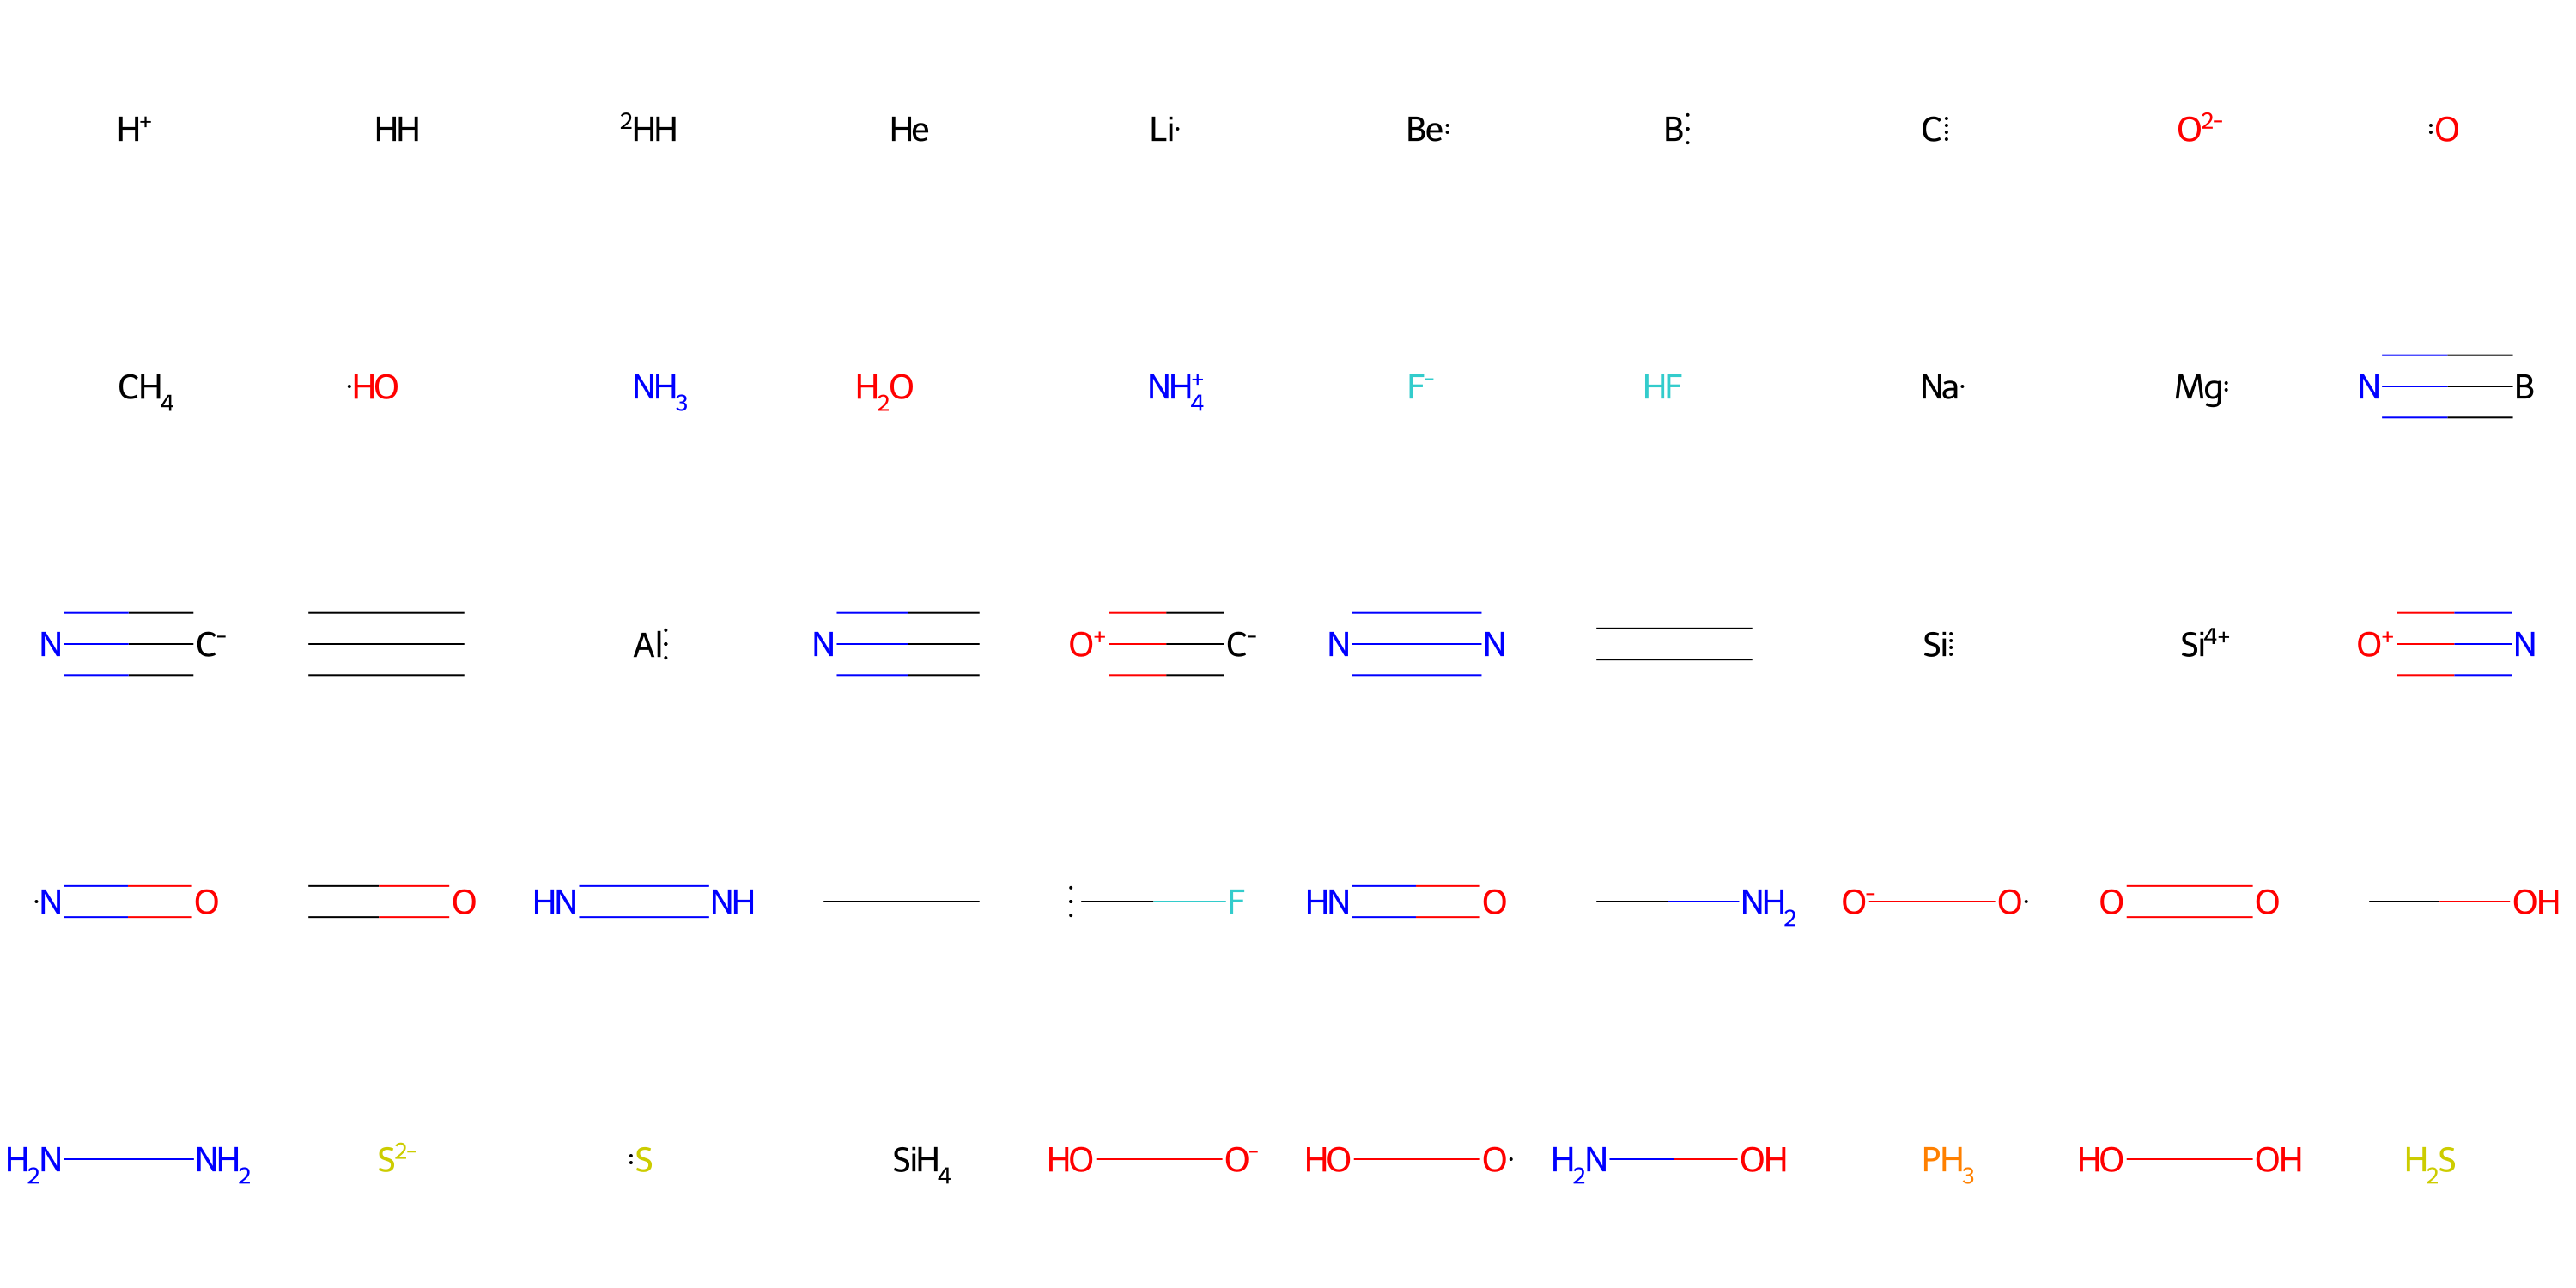

In [54]:
Chem.Draw.MolsToGridImage(mol_list, molsPerRow=10, subImgSize=(300,300))

bins = range(1, 7000, 1000)

groups = data.groupby(['mw', pd.cut(data.mw, bins)])
groups.size().unstack()

In [72]:
df = data.mw.value_counts(bins=50, sort=False)
df

(-6.401000000000001, 149.168]    1556
(149.168, 297.328]               4660
(297.328, 445.488]               4880
(445.488, 593.647]               2027
(593.647, 741.807]                685
(741.807, 889.967]                328
(889.967, 1038.127]               175
(1038.127, 1186.287]              111
(1186.287, 1334.447]               68
(1334.447, 1482.606]               52
(1482.606, 1630.766]               41
(1630.766, 1778.926]               35
(1778.926, 1927.086]               22
(1927.086, 2075.246]               14
(2075.246, 2223.406]                8
(2223.406, 2371.565]                4
(2371.565, 2519.725]               10
(2519.725, 2667.885]                7
(2667.885, 2816.045]                6
(2816.045, 2964.205]                6
(2964.205, 3112.365]                5
(3112.365, 3260.524]                3
(3260.524, 3408.684]                4
(3408.684, 3556.844]                5
(3556.844, 3705.004]                1
(3705.004, 3853.164]                4
(3853.164, 4

In [69]:
help(data.mw.value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True) method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
    -------
    Series
    
    See Also
 